In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob

In [2]:
data = pd.read_csv('IMDB.csv')


In [3]:
missing_values = data.isnull().sum()
print("missing values:",missing_values)
print()
duplicate_reviews = data.duplicated(subset=['REVIEW']).sum()
print("duplicate reviews:",duplicate_reviews)

missing values: AUTHOR      0
TITLE       0
REVIEW      0
RATING    118
dtype: int64

duplicate reviews: 31


In [4]:
'''dropping rows that have null values and 
dropping any duplicate reviews'''
data = data.dropna().drop_duplicates(subset='REVIEW', keep='first')
data
missing_values = data.isnull().sum()
print("missing values:",missing_values)
print()
duplicate_reviews = data.duplicated(subset=['REVIEW']).sum()
print("duplicate reviews:",duplicate_reviews)

missing values: AUTHOR    0
TITLE     0
REVIEW    0
RATING    0
dtype: int64

duplicate reviews: 0


In [5]:
'''1. Using textblob get the polarity of the rating (Textblob(review).sentiment.polarity)'''
data['polarity'] = data['REVIEW'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head()

,AUTHOR,TITLE,REVIEW,RATING,polarity
0,margarida-44311,Not Bad,I don't get all the terrible reviews for this ...,5.0,0.021383
1,joemay-2,What are all the bad reviews about is it a wo...,I cannot believe anyone could give this film l...,8.0,0.311111
2,nebk,Great White=Jaws Lite,Great White is not the worst way to spend 90 m...,4.0,0.076299
3,kuarinofu,Bare-bones killer shark film,Great White is as basic of a killer shark film...,4.0,0.013755
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI","Terrible story, dialogue and CGI. The film has...",4.0,0.038889


In [6]:
'''
2. Using VADER get the probability that a review is positive, negative, or neutral
(SenitmentIntensityAnalyzer().polarity_scores(review)'''

data['probability'] = data['REVIEW'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x))
data.head()

,AUTHOR,TITLE,REVIEW,RATING,polarity,probability
0,margarida-44311,Not Bad,I don't get all the terrible reviews for this ...,5.0,0.021383,"{'neg': 0.169, 'neu': 0.71, 'pos': 0.122, 'com..."
1,joemay-2,What are all the bad reviews about is it a wo...,I cannot believe anyone could give this film l...,8.0,0.311111,"{'neg': 0.081, 'neu': 0.688, 'pos': 0.231, 'co..."
2,nebk,Great White=Jaws Lite,Great White is not the worst way to spend 90 m...,4.0,0.076299,"{'neg': 0.092, 'neu': 0.735, 'pos': 0.172, 'co..."
3,kuarinofu,Bare-bones killer shark film,Great White is as basic of a killer shark film...,4.0,0.013755,"{'neg': 0.142, 'neu': 0.773, 'pos': 0.086, 'co..."
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI","Terrible story, dialogue and CGI. The film has...",4.0,0.038889,"{'neg': 0.024, 'neu': 0.804, 'pos': 0.172, 'co..."


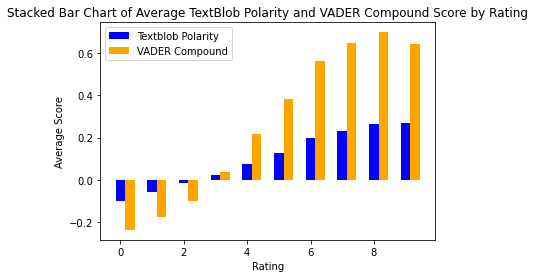

In [7]:
'''3. For each rating score graph the corresponding average value of textblob polarity and VADER 
compound score'''
data['compound_score'] = data['probability'].apply(lambda x: x['compound'])
df = data.groupby('RATING').agg({'polarity': 'mean', 'compound_score': 'mean'}).reset_index()

import matplotlib.pyplot as plt

ratings = sorted(data['RATING'].unique())
avg_textblob_polarity = data.groupby('RATING')['polarity'].mean()
avg_vader_compound = data.groupby('RATING')['compound_score'].mean()

index = np.arange(len(ratings))
bar_width = 0.3
plt.bar(index, avg_textblob_polarity, bar_width, label='Textblob Polarity', color='blue')
plt.bar(index + bar_width, avg_vader_compound, bar_width, label='VADER Compound', color='orange')

plt.xlabel('Rating')
plt.ylabel('Average Score')
plt.title('Stacked Bar Chart of Average TextBlob Polarity and VADER Compound Score by Rating')
plt.legend()
plt.show()

In [8]:
'''4. Combine the scores and classify each rating as Positive, Negative, or Neutral.'''
def classify_rating(combined_score):
    if combined_score >= 0.05:
        return 'Positive'
    elif combined_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Combine scores
data['Combined_Score'] = (data['polarity'])*0.4 + (data['compound_score'])*0.6

# Classify ratings
data['Sentiment'] = data['Combined_Score'].apply(classify_rating)

data.head()

,AUTHOR,TITLE,REVIEW,RATING,polarity,probability,compound_score,Combined_Score,Sentiment
0,margarida-44311,Not Bad,I don't get all the terrible reviews for this ...,5.0,0.021383,"{'neg': 0.169, 'neu': 0.71, 'pos': 0.122, 'com...",-0.5823,-0.340827,Negative
1,joemay-2,What are all the bad reviews about is it a wo...,I cannot believe anyone could give this film l...,8.0,0.311111,"{'neg': 0.081, 'neu': 0.688, 'pos': 0.231, 'co...",0.7269,0.560584,Positive
2,nebk,Great White=Jaws Lite,Great White is not the worst way to spend 90 m...,4.0,0.076299,"{'neg': 0.092, 'neu': 0.735, 'pos': 0.172, 'co...",0.9822,0.619840,Positive
3,kuarinofu,Bare-bones killer shark film,Great White is as basic of a killer shark film...,4.0,0.013755,"{'neg': 0.142, 'neu': 0.773, 'pos': 0.086, 'co...",-0.9308,-0.552978,Negative
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI","Terrible story, dialogue and CGI. The film has...",4.0,0.038889,"{'neg': 0.024, 'neu': 0.804, 'pos': 0.172, 'co...",0.9294,0.573196,Positive
